# **คณันสักก์ สุจารีย์ 163404140001 วต.3-1**

In [1]:
import cv2 as cv # import library opencv โดยย่อเป็น cv
import numpy as np # import library numpy โดยย่อเป็น np
import random
from matplotlib import pyplot as plt # import library matplotlib ในส่วนย่อย pyplot โดยย่อเป็น plt
from google.colab.patches import cv2_imshow

In [3]:
!wget https://images6.alphacoders.com/103/1035269.jpg #ดาวน์โหลดไฟล์

--2022-09-22 13:49:03--  https://images6.alphacoders.com/103/1035269.jpg
Resolving images6.alphacoders.com (images6.alphacoders.com)... 104.20.15.194, 172.67.3.36, 104.20.14.194, ...
Connecting to images6.alphacoders.com (images6.alphacoders.com)|104.20.15.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1929696 (1.8M) [image/jpeg]
Saving to: ‘1035269.jpg’

1035269.jpg         100%[===================>]   1.84M  7.36MB/s    in 0.3s    

2022-09-22 13:49:04 (7.36 MB/s) - ‘1035269.jpg’ saved [1929696/1929696]



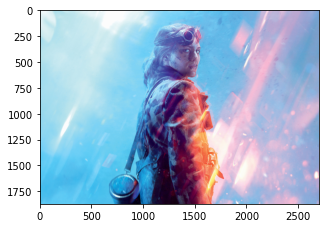

In [5]:
original_img = cv.imread('img.png') #อ่านไฟล์ img.png แล้วเก็บค่าในตัวแปร original_img
RGB_img = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)  #แปลงภาพเป็น BGR2RGB
plt.rcParams["figure.figsize"] = [5, 8] #กำหนดขนาดภาพ 5x8
plt.imshow(RGB_img) #แสดงภาพ
plt.show()

**เป็นชุดคำสั่งที่ใช้ในการสร้าง GaussianNoise**

In [6]:
# modified from https://gist.github.com/Prasad9/28f6a2df8e8d463c6ddd040f4f6a028a
def gauss_noise(img,mean = 0,var = 200):
    sigma = var ** 0.5
    gaussian1 = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))
    gaussian2 = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))
    gaussian3 = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))
    noisy_image = np.zeros(img.shape, np.float32)
    if len(img.shape) == 2:
        noisy_image = img + gaussian1
    else:
        noisy_image[:, :, 0] = img[:, :, 0] + gaussian1
        noisy_image[:, :, 1] = img[:, :, 1] + gaussian2
        noisy_image[:, :, 2] = img[:, :, 2] + gaussian3
    cv.normalize(noisy_image, noisy_image, 0, 255, cv.NORM_MINMAX, dtype=-1)
    noisy_image = noisy_image.astype(np.uint8)
    return noisy_image

**เป็นชุดคำสั่งที่ใช้ในการสร้าง Salt&Pepper**

In [7]:
# modified from https://www.py4u.net/discuss/14307
def sp_noise(img,prob=0.05):
    output = np.zeros(img.shape,np.uint8)
    thres = 1 - prob
    ch =  3 if len(output.shape)!=2 else 1
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = (0,0,0) if ch==3 else 0 #pepper
            elif rdn > thres:
                output[i][j] = (255,255,255) if ch==3 else 255 #salt
            else:
                output[i][j] = img[i][j]
    return output

## Generate Salt and Pepper Noise

In [8]:
sp_img = sp_noise(RGB_img,0.02) #สร้าง noise
gauss_img = gauss_noise(RGB_img)

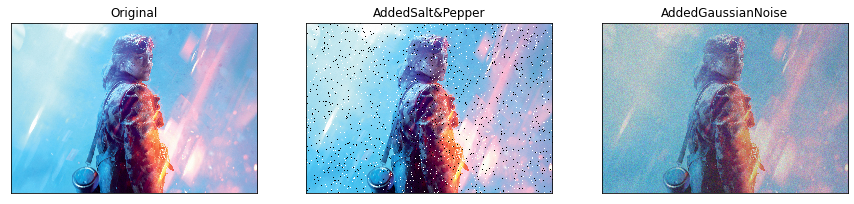

In [9]:
plt.rcParams["figure.figsize"] = [15, 7] #กำหนดขนาดภาพ 15x7
plt.subplot(131),plt.imshow(RGB_img,interpolation='none'),plt.title('Original'),plt.xticks([]),plt.yticks([]) #แสดงภาพ RGB_img ชื่อ Title ว่า Original
plt.subplot(132),plt.imshow(sp_img,interpolation='none'),plt.title('AddedSalt&Pepper'),plt.xticks([]),plt.yticks([]) #แสดงภาพ sp_img ชื่อ Title ว่า AddedSalt&Pepper
plt.subplot(133),plt.imshow(gauss_img,interpolation='none'),plt.title('AddedGaussianNoise'),plt.xticks([]),plt.yticks([]) #แสดงภาพ gauss_img ชื่อ Title ว่า AddedGaussianNoise
plt.show()

## จงแก้ Noise Salt & Peppper

In [ ]:
# แก้เลยนะ อิอิ แก้ รูปในตัวแปรsp_imgให้เหมือนเดิมมากที่สุด

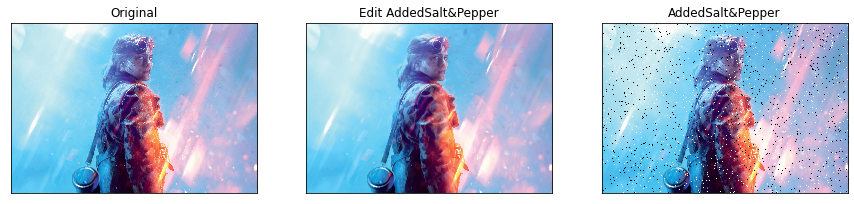

In [12]:
median = cv.medianBlur(sp_img,9) #ใช้งานฟังก์ชั่น medianBlur
plt.subplot(131),plt.imshow(RGB_img,interpolation='none'),plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(median,interpolation='none'),plt.title('Edit AddedSalt&Pepper'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(sp_img,interpolation='none'),plt.title('AddedSalt&Pepper'),plt.xticks([]),plt.yticks([])
plt.show()

ภาพที่ได้มีความใกล้เคียงภาพเดิม

In [ ]:
# รันผลลัพธ์ให้ดูด้วยนะ อิอิ เปรียบเทียบก่อนแก้ ในตัวแปร sp_img และหลังแก้ที่ตัวแปรที่เราเก็บภาพไว้เปรียบเทียบกัน

## จงแก้ Noise Gaussian

In [ ]:
# แก้เลยนะ อิอิ แก้ รูปในตัวแปรgauss_imgให้เหมือนเดิมมากที่สุด

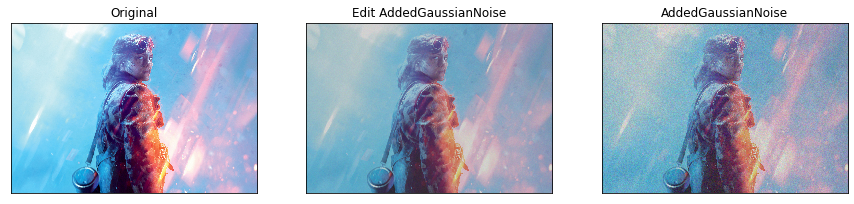

In [13]:
blur = cv.GaussianBlur(gauss_img,(5,5),0) #ใช้งานฟังก์ชั่น GaussianBlur
plt.subplot(131),plt.imshow(RGB_img,interpolation='none'),plt.title('Original'),plt.xticks([]),plt.yticks([])
plt.subplot(132),plt.imshow(blur,interpolation='none'),plt.title('Edit AddedGaussianNoise'),plt.xticks([]),plt.yticks([])
plt.subplot(133),plt.imshow(gauss_img,interpolation='none'),plt.title('AddedGaussianNoise'),plt.xticks([]),plt.yticks([])
plt.show()

ภาพที่ได้มีสีซีด กว่าภาพเดิม

In [ ]:
# รันผลลัพธ์ให้ดูด้วยนะ อิอิ เปรียบเทียบก่อนแก้ ในตัวแปร gauss_img และหลังแก้ที่ตัวแปรที่เราเก็บภาพไว้เปรียบเทียบกัน